# <a id='toc1_'></a>[IF3070 Foundations of Artificial Intelligence | Tugas Kecil 2](#toc0_)

This notebook serves as a template for the assignment. Please create a copy of this notebook to complete your work. You can add more code blocks if needed.

Group Number: xx

Group Members:
- Josia Silalahi (18222075)
- Muhammad Adli Arindra (18222089)

## Import Libraries

In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import kstest

## Import Dataset

In [ ]:
df = pd.read_csv("train.csv")
df.head()

,id,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,1,NaN,https://www.northcm.ac.th,24.0,www.northcm.ac.th,17.0,0.0,NaN,0.800000,NaN,...,0.0,0.0,1.0,NaN,3.0,NaN,69.0,NaN,NaN,1
1,4,8135291.txt,http://uqr.to/1il1z,NaN,NaN,NaN,NaN,to,1.000000,0.000896,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1.0,0
2,5,586561.txt,https://www.woolworthsrewards.com.au,35.0,www.woolworthsrewards.com.au,28.0,0.0,au,0.857143,NaN,...,1.0,0.0,1.0,33.0,7.0,8.0,15.0,NaN,2.0,1
3,6,NaN,NaN,31.0,NaN,NaN,NaN,com,0.562500,0.522907,...,1.0,0.0,1.0,24.0,5.0,14.0,NaN,NaN,NaN,1
4,11,412632.txt,NaN,NaN,www.nyprowrestling.com,22.0,0.0,NaN,1.000000,NaN,...,0.0,0.0,1.0,NaN,NaN,14.0,NaN,0.0,NaN,1


# <a id='toc2_'></a>[<strong>1. Exploratory Data Analysis</strong>](#toc0_)

Exploratory Data Analysis (EDA) is a crucial step in the data analysis process that involves examining and visualizing data sets to uncover patterns, trends, anomalies, and insights. It is the first step before applying more advanced statistical and machine learning techniques. EDA helps you to gain a deep understanding of the data you are working with, allowing you to make informed decisions and formulate hypotheses for further analysis.

<h2><strong>A. Data Understanding</strong></h2>

<h3>1.1.A. The size of the data</h3>

In [112]:
len(df)

140404

<h3>1.1.B. The data types of each feature<h3>

In [113]:
df.dtypes

id                              int64
FILENAME                       object
URL                            object
URLLength                     float64
Domain                         object
DomainLength                  float64
IsDomainIP                    float64
TLD                            object
CharContinuationRate          float64
TLDLegitimateProb             float64
URLCharProb                   float64
TLDLength                     float64
NoOfSubDomain                 float64
HasObfuscation                float64
NoOfObfuscatedChar            float64
ObfuscationRatio              float64
NoOfLettersInURL              float64
LetterRatioInURL              float64
NoOfDegitsInURL               float64
DegitRatioInURL               float64
NoOfEqualsInURL               float64
NoOfQMarkInURL                float64
NoOfAmpersandInURL            float64
NoOfOtherSpecialCharsInURL    float64
SpacialCharRatioInURL         float64
IsHTTPS                       float64
LineOfCode  

<h3>1.1.C. The number of unique values in categorical features<h3>

Checking all the columns where its unique values are below 10

In [114]:
below_10 = [col for col in df.columns if df[col].nunique() < 10]

df[below_10].nunique().sort_values(ascending=False).head(5)

NoOfObfuscatedChar       8
NoOfSubDomain            8
NoOfQMarkInURL           4
IsDomainIP               2
HasExternalFormSubmit    2
dtype: int64

Since the 3 values on the top are numerical values, all the categorical feature in this dataset has a unique value of **2**

In [177]:
categorical_columns = [col for col in df.columns if df[col].nunique() < 4]

categorical_df = df[categorical_columns]

print("All unique values of categorical features:\n")
for col in categorical_df.columns:
    values = categorical_df[col].unique()
    print(f"{col}: {values[~np.isnan(values)].astype(int)}")

All unique values of categorical features:

IsDomainIP: [0 1]
HasObfuscation: [0 1]
IsHTTPS: [1 0]
HasTitle: [1 0]
HasFavicon: [0 1]
Robots: [0 1]
IsResponsive: [1 0]
NoOfURLRedirect: [0 1]
NoOfSelfRedirect: [0 1]
HasDescription: [0 1]
HasExternalFormSubmit: [0 1]
HasSocialNet: [1 0]
HasSubmitButton: [1 0]
HasHiddenFields: [1 0]
HasPasswordField: [0 1]
Bank: [1 0]
Pay: [0 1]
Crypto: [0 1]
HasCopyrightInfo: [1 0]
label: [1 0]


<h3>1.1.D The minimum, maximum, mean, median, and standard deviation values for non-categorical features</h3>

In [116]:
non_categorical_columns = [col for col in df.columns if col not in categorical_columns]
non_categorical_df = df[non_categorical_columns]

output = non_categorical_df.describe().loc[['min', 'max', 'mean', 'std']].round(2)
median_row = non_categorical_df.median(numeric_only=True)
output.loc['median'] = median_row

output.transpose().round(2)

,min,max,mean,std,median
id,1.0,235795.00,117682.63,68122.01,117421.50
URLLength,14.0,4054.00,27.70,23.14,26.00
DomainLength,4.0,93.00,19.62,5.83,19.00
CharContinuationRate,0.0,1.00,0.92,0.16,1.00
TLDLegitimateProb,0.0,0.52,0.28,0.25,0.52
URLCharProb,0.0,0.09,0.06,0.01,0.06
TLDLength,2.0,13.00,2.73,0.53,3.00
NoOfSubDomain,0.0,7.00,1.16,0.45,1.00
NoOfObfuscatedChar,0.0,291.00,0.01,1.08,0.00
ObfuscationRatio,0.0,0.21,0.00,0.00,0.00


<h3>1.1.E. The significance of gathering the first four pieces of information.<h3>

ini isinya <strong>YAPPING</strong> aja ya, isi yang ini <strong>JOS</strong>

### <a id='toc2_1_1_'></a>[Step 2](#toc0_)

Find the following:

1. Missing values for each feature.
2. Outliers for each feature (use the methods you are familiar with).
3. Why is it necessary to identify missing values and outliers?

<h3>1. Missing values for each feature.</h3>

In [117]:
print("The count of missing values for each feature:")
df.isna().sum().sort_values(ascending=False)

The count of missing values for each feature:


Domain                        70197
NoOfExternalRef               69379
LineOfCode                    69153
HasSocialNet                  67999
LargestLineLength             67928
NoOfURLRedirect               67384
HasCopyrightInfo              67345
NoOfCSS                       67134
NoOfObfuscatedChar            66798
NoOfSelfRedirect              66715
HasPasswordField              66535
LetterRatioInURL              65746
HasObfuscation                65720
ObfuscationRatio              64598
NoOfLettersInURL              63338
SpacialCharRatioInURL         62834
HasSubmitButton               61620
NoOfEqualsInURL               61578
NoOfJS                        60801
URLLength                     60639
NoOfDegitsInURL               58810
HasFavicon                    58422
Title                         58247
FILENAME                      57532
HasExternalFormSubmit         55592
Bank                          54996
HasDescription                54639
DegitRatioInURL             

In [118]:
print("Number of rows without any NaN values: ", df.notna().all(axis=1).sum())

Number of rows without any NaN values:  0


<h3>2. Outliers for each feature</h3>

Before we find all the outliers, first we need to determine the distribution of each of the features in the dataset

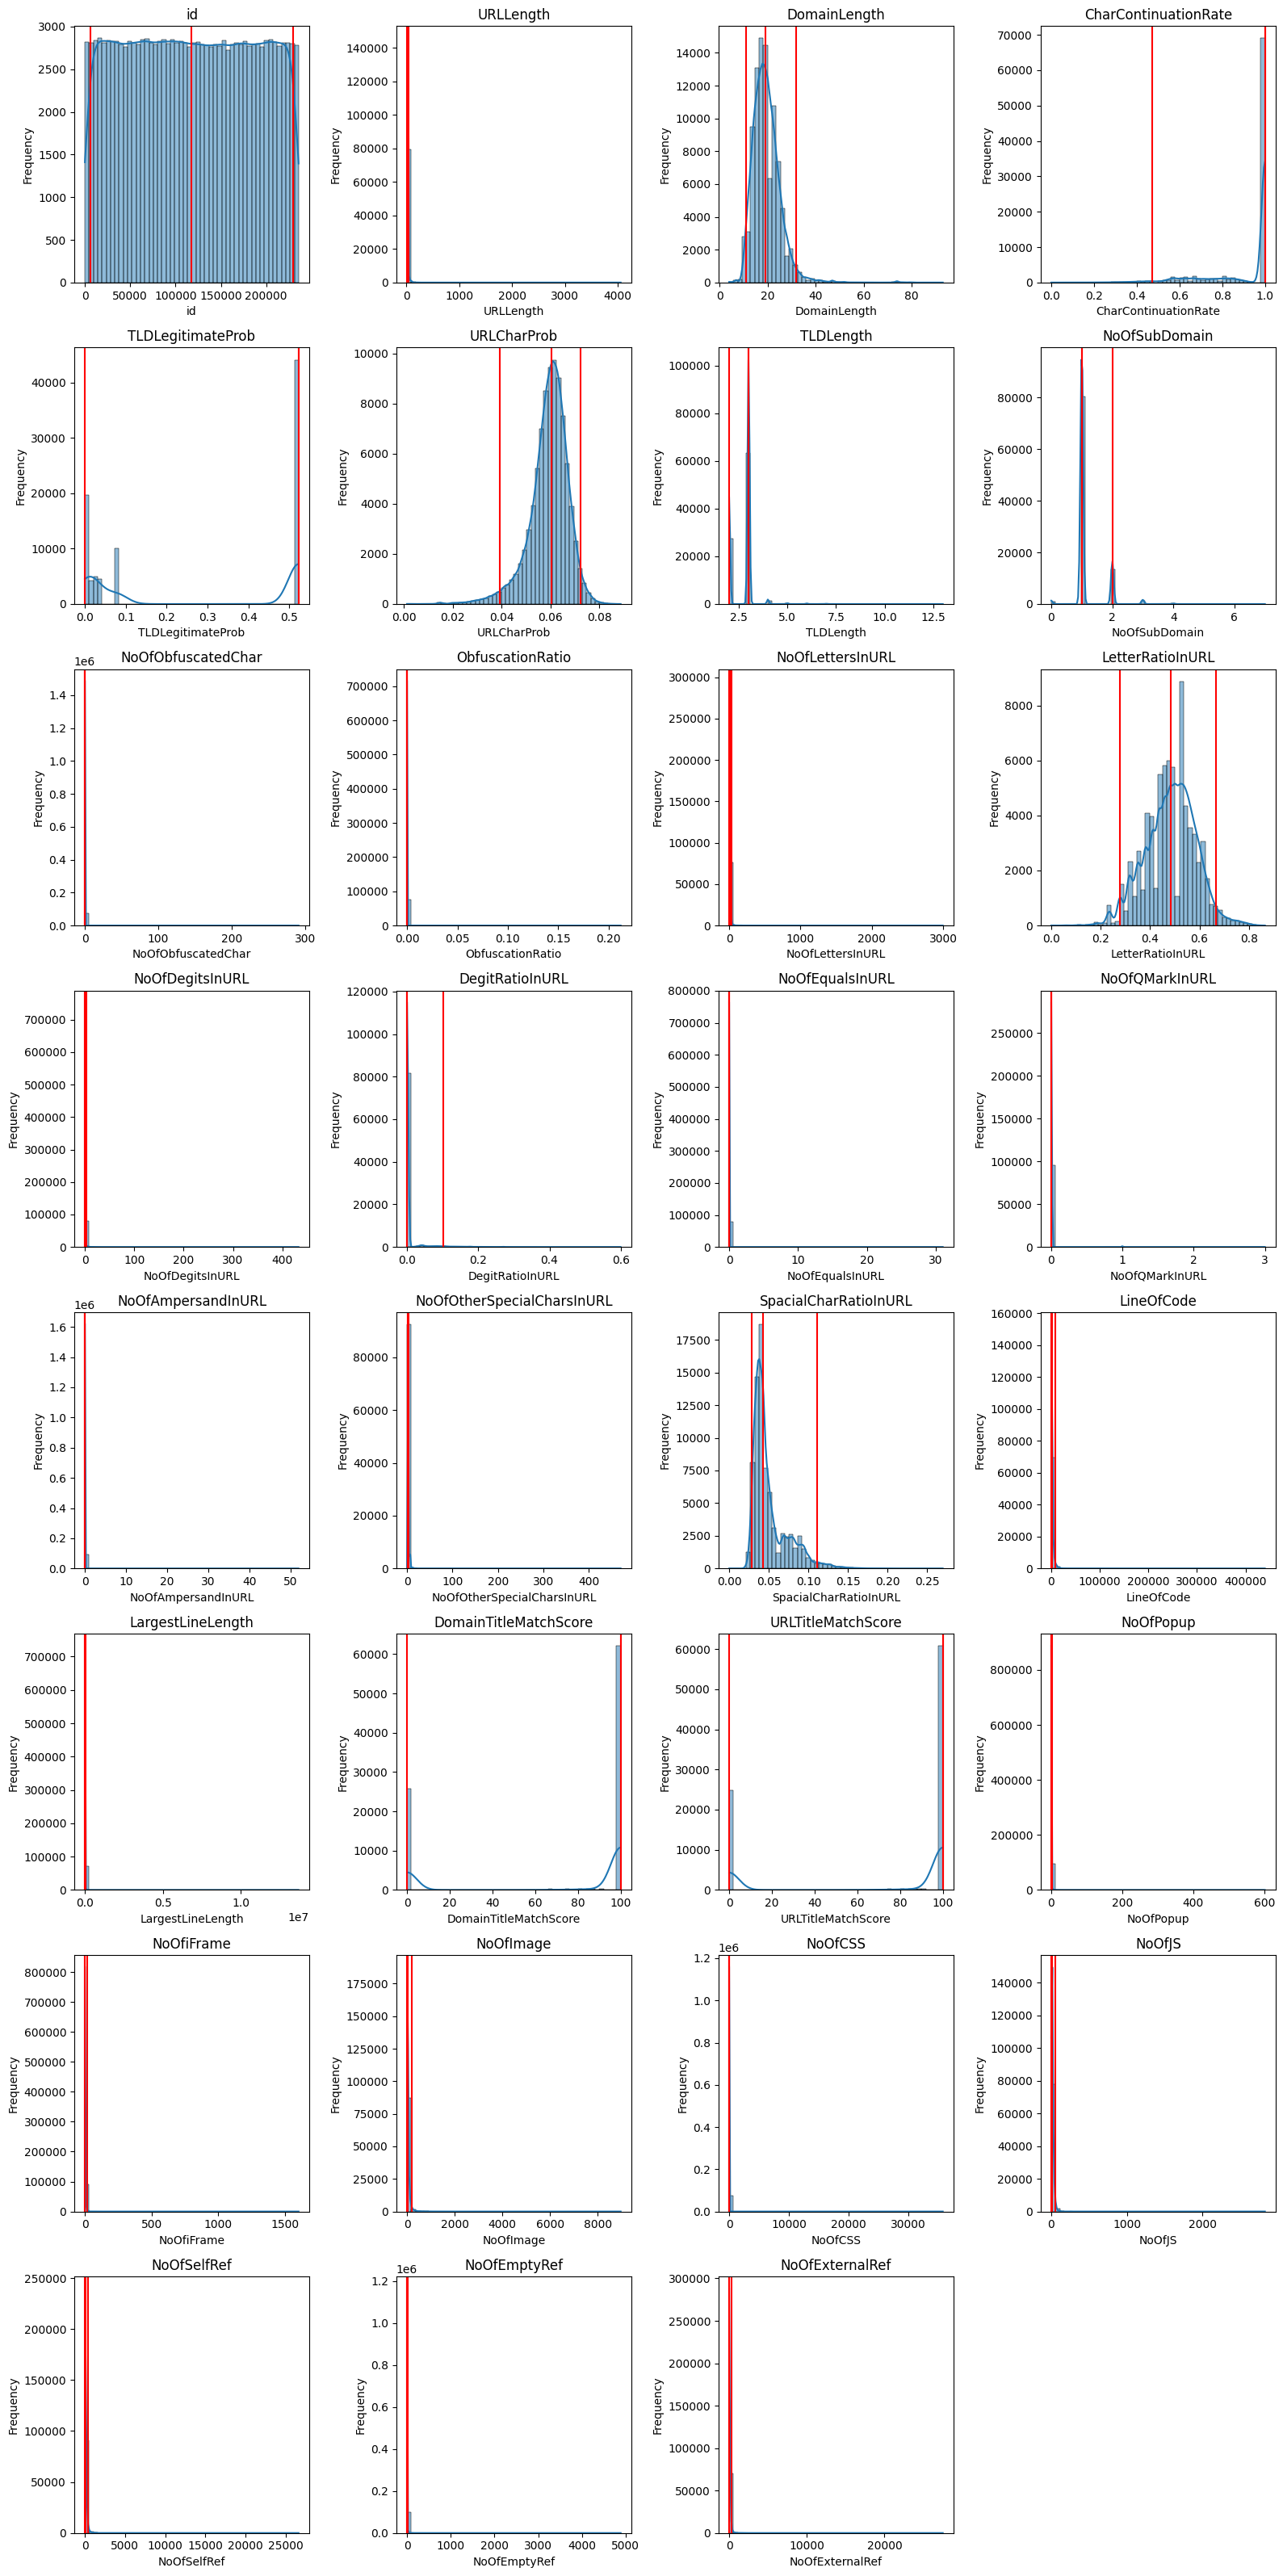

In [188]:
numerical_df = non_categorical_df.select_dtypes(include=['int64', 'float64'])

ncols = 4
nrows = (len(numerical_df.columns) + ncols - 1) // ncols

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 4 * nrows))

axes = axes.flatten()

for i, column in enumerate(numerical_df.columns):
    sns.histplot(df[column].dropna(), kde=True, bins=50, ax=axes[i])

    Q1 = df[column].quantile(0.025)
    Q2 = df[column].quantile(0.5)
    Q3 = df[column].quantile(0.975)

    axes[i].axvline(Q1, color='r')
    axes[i].axvline(Q2, color='r')
    axes[i].axvline(Q3, color='r')

    axes[i].set_title(column)
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

<h3>3. The importance of identifying missing values and outliers</h3>
ini isinya <strong>YAPPING</strong> aja ya, isi yang ini <strong>JOS</strong>

### <a id='toc2_1_2_'></a>[Step 3](#toc0_)

Find the following:

1. Correlations between features.
2. Visualize the distribution of each feature (categorical and continuous).
3. Visualize the correlation between features and the target variable.
4. Explain the significance of understanding feature distributions and correlations.

In [ ]:
# Write your code here

## <a id='toc2_2_'></a>[B. Data Insights](#toc0_)

The objective of this section is for participants to understand how to formulate and get many insights from the given data so that we can improve the model performance. Given example questions:

1. How was the proportion between phishing and non-phishing URLs on security related features (`IsHTTPS` and `Robots`)?
2. Is there a significant correlation between the label of a URL (phishing or non-phishing) and its URL characteristics?
3. How does website-resource-related features vary across phishing and non-phishing URLs?

### <a id='toc2_2_1_'></a>[Step 1](#toc0_)

Answer the three example questions by visualizing and explaining the insights for each question. Add markdown texts to explain the visualizations.

#### <a id='toc2_2_1_1_'></a>[How was the proportion between phishing and non-phishing URLs on security related features (`IsHTTPS` and `Robots`)?](#toc0_)

In [120]:
# Write your code here

#### <a id='toc2_2_1_2_'></a>[Is there a significant correlation between the label of a URL (phishing or non-phishing) and its URL characteristics?](#toc0_)

URL Characteristics:
- `URLLength`
- `Domain`
- `DomainLength`
- `IsDomainIP`
- `TLD`
- `TLDLength`
- `NoOfSubDomain`
- `HasObfuscation`
- `NoOfObfuscatedChar`
- `ObfuscationRatio`
- `NoOfLettersInURL`
- `LetterRatioInURL`
- `NoOfDegitsInURL`
- `DegitRatioInURL`
- `NoOfEqualsInURL`
- `NoOfQMarkInURL`
- `NoOfAmpersandInURL`
- `NoOfOtherSpecialCharsInURL`
- `SpacialCharRatioInURL`
- `CharContinuationRate`

In [121]:
# Write your code here

#### <a id='toc2_2_1_3_'></a>[How does website-resource-related features vary across phishing and non-phishing URLs?](#toc0_)

Website resource related features:
- `NoOfImage`
- `NoOfCSS`
- `NoOfJS`
- `NoOfSelfRef`
- `NoOfEmptyRef`
- `NoOfExternalRef`

In [122]:
# Write your code here

### <a id='toc2_2_2_'></a>[Step 2](#toc0_)

Try to formulate three other new questions and answer them with the methods used before.

#### <a id='toc2_2_2_1_'></a>[Your first question (replace this heading)](#toc0_)

In [123]:
# Write your code here

#### <a id='toc2_2_2_2_'></a>[Your second question (replace this heading)](#toc0_)

In [124]:
# Write your code here

#### <a id='toc2_2_2_3_'></a>[Your third question (replace this heading)](#toc0_)

In [125]:
# Write your code here